# K-Armed Bandit Experiments Part 1

**TLDR** 

For k-armed bandit problems, we see the importance of balancing exploration and exploitation. Just because we found a good action, doesn't mean we should stick to it. We should allocate some time to explore the rewards from less observed actions that could potentially give us higher rewards!

**What's the K-armed bandit problem?**

K-armed bandit problems are the simplest reinforcement learning problems. The idea is there is a set of K distributions of rewards. This distribution is unknown the the RL agent. The goal is to maximize the rewards by sampling from each distribution, much like pulling the lever of the slot machine. Except in this case there are K slot machines, and the distribution of possible winnings in each slot machine are different and unknown. The RL agent must therefore infer the distributions as it plays the game. Note that it's possible that each of the K distributions change over time. In this case, the agent must be able to adapt to this. 

Here, we experiment on the K-armed bandit problem. 

**Stationary vs non-stationary rewards**

We generated K randomly-generated Gaussian distributions of rewards, where the standard deviation is 1 and mean is taken from a Gaussian of 0 mean and 1 standard deviation. We then consider two cases:
* Stationary rewards: the reward distributions do not change over the course of the game
* Non-stationary rewards: the reward distribution means gradually change via random walk where the changes are sampled from a Gaussian with mean 0 and standard deviation 1.

**Four kinds of bandit algorithms**

We explore four kinds of bandit algorithms:
* Greedy with sample-averaging
* Greedy with weighted averaging
* Epsilon-Greedy with sample-averaging
* Espilon-Greedy with weighted averaging

**Sample-average? Weighted average?**

Sample-averaging simply means, our estimate of the expected value of each distribution is a simple mean of the collected datapoints about that distribution:

$Q = \frac{1}{N} \sum_i^N{R_i}$

Meanwhile, weighted averaging means that we place more importance on the more recent rewards in anticipation of changing distributions. The estimate of the value follows an exponentially decaying average:

$Q = (1-\alpha)^N + \sum_i^N{\alpha * (1-\alpha)^{N-i}R_i}$

$\alpha$ is a fixed "step size" parameter in contrast to sample-averaging where effectively $\alpha = 1/N(a)$ where $N(a)$ is the number of times action $a$ is selected as the game progresses.

**Greedy? Epsilon-Greedy?**

In these methods, we estimate the expected value of each of the K distributions from our experience while playing the game. We then choose the action as the one that is associated with the distribution of highest estimated expected reward, which mathematically means,

$a = \text{argmax}_aQ(a)$

This formulation is called Greedy, where always the action or "arm" in the case of K-armed bandit with the highest estimated expected reward $Q$ is chosen. However, a modification of this is called Epsilon-Greedy or $\epsilon$-Greedy where at any timestep, there is $\epsilon$ probability of choosing a random action with equal probability and $1-\epsilon$ probability of a greedy selection.

**Exploitation vs Exploration**

When we select a greedy action, we call this "exploitation" because we are maximizing our existing knowledge. Meanwhile when we select a random action regardless of past rewards, we call this "exploration" because we are exploring potentially better actions than what we have observed. There is a trade-off between these two because for a given model, it cannot explore and exploit at the same time. 

When the model exploits, it is maximizing rewards from more certain actions at the expense of losing opportunity to try potentially better actions. When a model explores, it looks for potentially good actions but miss out on the opportunity to maximize more certain good actions, while also exposing itself to risk of lower rewards.

In [1]:
import sys
sys.path.append("..")
from scripts.k_armbed_bandit.functions import *

import warnings
warnings.filterwarnings("ignore")

## Experiments

We summarize below our experiment parameters. There are `k_arms` arms or distributions of rewards. Each game has `steps` timesteps. For our analysis we run `n_trials` trials or independent runs of the game, the results of which we average. The standard deviation for sampling how much we change the means of the K reward distributions for the non-stationary problem is some value `q_delta_std`.

In [2]:
k_arms = 10 # number of levers / arms
steps = 2000 # count steps in an episode
n_trials = 2000 # number of independent runs/trials
q_delta_std = 0.1 # standard deviation of the Gaussian used for random walk on the true q() values

### Stationary Problem

Below is an example of K randomly generated distributions of rewards for the K-armed bandit problem with fixed reward distributions.

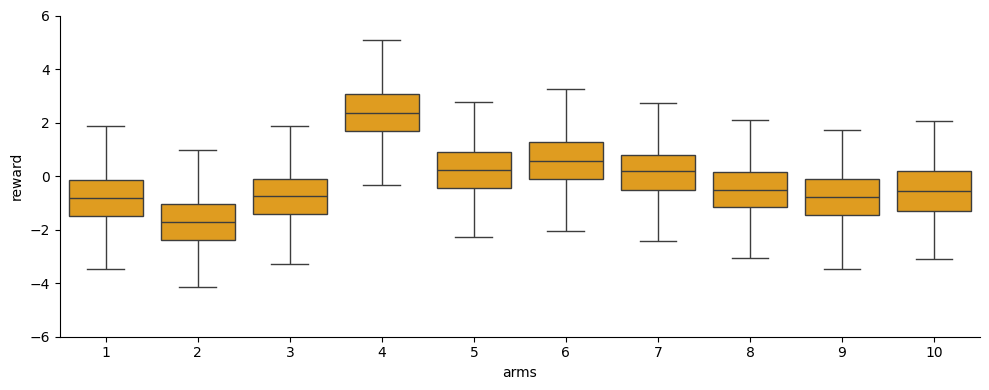

In [3]:
def animate(iter):
    global q_mu

    # plot
    ax.clear()
    ax.set_xticks(range(k_arms), range(1, k_arms+1))
    ax.set_xlabel("arms")
    ax.set_ylabel("reward")
    ax.set_ylim(-6, 6)
    # ax.set_title(f"Iter {iter}")
    
    viz_r_dist(k_arms, q_mu, N=1000, ax=ax)
    sns.despine()    
    plt.tight_layout()

    # random walk
    q_mu = random_walk_q(q_mu, std=q_delta_std)    
    
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
q_mu = init_q(k=k_arms, random_q_init=True, std=1)    
animate(1)

For this stationary reward problem, we show to the left below the average reward over timesteps for the different algorithms. Here `eps=0` means Greedy, and `eps=0.1` means Epsilon-Greedy. `step_size = 1/N` means the algorithm uses sample-averaging, while `step_size = 0.1` means the algorithm uses weighted averaging with $\alpha = 0.1$ 

To the right, we show the proportion among all trials that the optimal action (corresponding to the highest true expected return $q(a)$) was selected.

**Observations**
* Best performers
    * Epsilon-Greedy with weighted averaging (red) which also got the highest percent optimal actions
    * Greedy with sample-averaging (blue)

* Worst performers
    * Greedy with weighted averaging (green)
    * Epsilon-Greedy with sample-averaging (orange)    

**Questions (I don't know the answers to yet)**
* For Greedy, why does weighted averaging worsen performance while sample averaging improves performance?
* For Epsilon-Greedy, why does weighted averaging improve performance while sample averaging worsens performance?

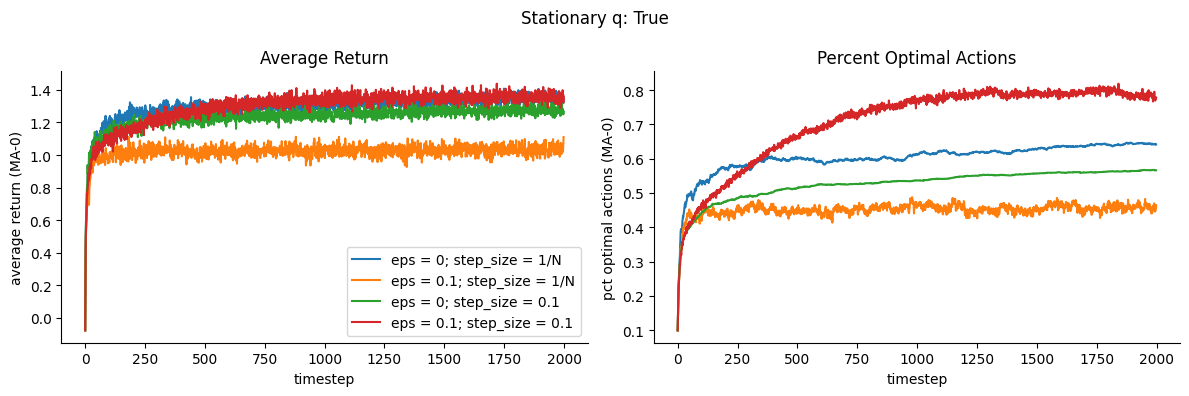

In [4]:
w = 0
stationary_q = True
random_q_init = True
step_sizes = ["1/N", 0.1]
eps_list = [0, 0.1]

plot_learning_curves(stationary_q, random_q_init, q_delta_std,
                     k_arms, n_trials, steps, step_sizes, eps_list, w)

### Non-stationary Problem

We show in the animation below an example of K randomly generated distributions that gradually change means over the course of the game.

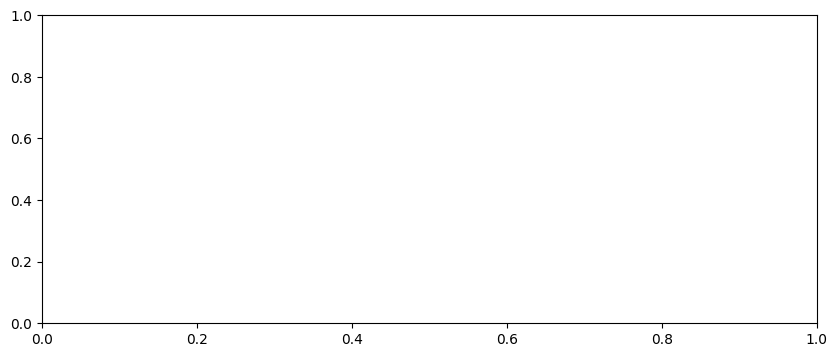

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

In [6]:
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=100, 
                               interval=1)
HTML(anim.to_jshtml(fps=10))

<Figure size 640x480 with 0 Axes>

We show below the results for the stationary reward problem.

**Observations**
* Best performers
    * Epsilon-Greedy with sample-averaging (orange) which also got the highest percent optimal actions
    * Epsilon-Greedy with weighted averaging(red)
* Worst performers
    * Greedy with sample-averaging (blue)
    * Greedy with weighted averaging (green)
* For our non-stationary rewards problem, the Greedy algorithms perform poorly, while epsilon-Greedy performs well. This seems to indicate that exploration is key for changing our non-stationary problem.
* In this case, sample-averaging performs better than weighted averaging

**Questions (I don't know the answers to yet)**
* I expected weighted averaging to perform better since intuitively, this places more importance on more recent rewards, which change over time. But this is not what happens, why?
* Given the trajectory, maybe it just takes a while for weighted averaging method to keep up? What if we increase the number of timesteps?
* What exactly happens beneath the hood that explains the worse performance of the Greedy algorithms?

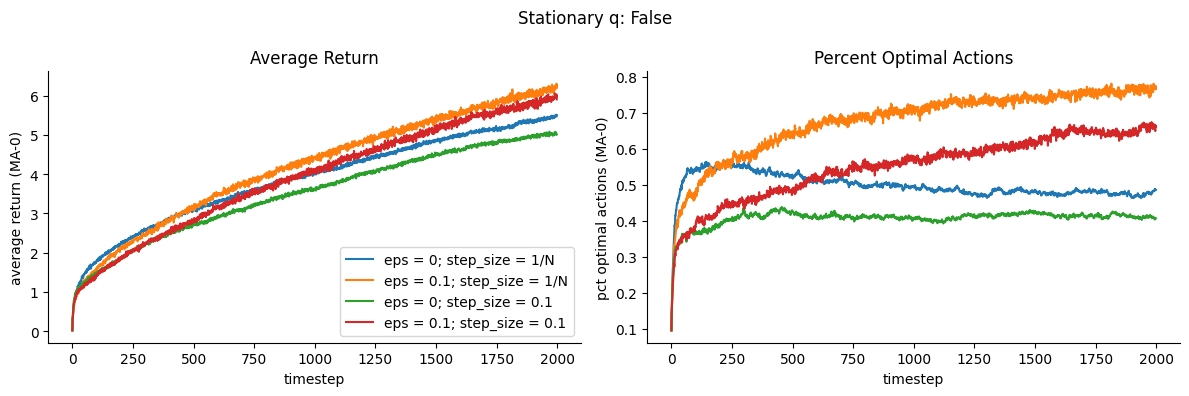

In [7]:
w = 0
stationary_q = False
random_q_init = True
step_sizes = ["1/N", 0.1]
eps_list = [0, 0.1]

plot_learning_curves(stationary_q, random_q_init, q_delta_std,
                     k_arms, n_trials, steps, step_sizes, eps_list, w)